In [1]:
from datetime import datetime, timezone, timedelta
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import sys
import xarray as xr
sys.path.append('../sdpm_py_util')
import ocn_functions as ocnfuns
import plotting_functions as pltfuns
import atm_functions as atmfuns
import init_funs as initfuns
import swan_functions as swanfuns
import river_functions as rivfuns
import grid_functions as grdfuns
from get_PFM_info import get_PFM_info
from util_functions import s_coordinate_4
from util_functions import display_timing_info
import observation_functions as obsfuns

from make_LV4_dotin_and_SLURM import make_LV4_dotin_and_SLURM
from make_LV4_coawst_dotins_dotsb import make_LV4_coawst_dotins_dotsb
from run_slurm_LV4 import run_slurm_LV4
import glob


import pickle
import os
import pprint
import subprocess


/home/mspydell/models/PFM_root/PFM/driver/../sdpm_py_util/ocn_functions.py:30: UserWarning: The seawater library is deprecated! Please use gsw instead.
  import seawater


In [4]:
fn = 'LV4_ocean_rst_202412051200_202412080000.nc'
print(fn[14:24])
tnow = datetime.now()
told = tnow - timedelta(days=7) # removing files older than 1 week from now
tf = datetime.strptime(fn[14:24],"%Y%m%d%H")
if tf<told:
    print('removing old restart file:')



2024120512
removing old restart file:


In [16]:
PFM = get_PFM_info()
friv = PFM['lv4_forc_dir'] + '/' + PFM['lv4_river_file']
ds = netCDF4.Dataset(friv)
print(ds['river_temp'][:,0,7])


[15.7749055  16.6843875  17.5938695  18.5033515  17.2597928  16.01623411
 14.77267542 14.09347974 13.41428405 12.73508837 12.81051416 12.88593996
 12.96136575 12.7746918  12.58801785 12.40134391 12.05966406 11.71798422
 11.37630437 11.18294551 10.98958666 10.7962278  13.13444708 15.47266635
 17.81088563 18.5112045  19.21152337 19.91184225 18.4544025  16.99696276
 15.53952301 14.77506419 14.01060537 13.24614655 12.92239717 12.59864779
 12.27489841 11.97176172 11.66862502 11.36548833 11.16732564 10.96916296
 10.77100028 10.77593287 10.78086545 10.78579804 13.42974894 16.07369983
 18.71765073 19.09176061 19.46587049 19.83998036 18.46529371 17.09060706
 15.71592041 14.75887194 13.80182347 12.844775   12.54131763 12.23786026
 11.93440289 11.93440289 11.93440289]


In [ ]:


RMG = grdfuns.roms_grid_to_dict(PFM['lv4_grid_file'])
#print(RMG['mask_rho'])

fatm = PFM['lv4_forc_dir'] + '/' + PFM['lv4_atm_file'] 
ds = netCDF4.Dataset(fatm)
temp_air = ds['Tair'][:]
print(np.shape(temp_air))
msk2d = RMG['mask_rho']
msk3d = np.broadcast_to( msk2d==0 , temp_air.shape)
Tair2 = np.mean(temp_air[msk3d])

Tair1 = np.mean(temp_air)
print(Tair1)
print(Tair2)

making river tracer dictionary
making the river discharge pickle file
using the nwm river forecast from the start time:
2024120506
to ensure that the forecast can be found on their server

river discharge data saved as pickle file
loading the river discharge pickle file...
the time-mean discharge for TJR is 
-0.4288888793024751 m3/s
the time-mean discharge for Sweetwater is 
-2.1399999521672726 m3/s
the time-mean discharge for Otay Mesa is 
-1.2499999720603228 m3/s
getting the river temperature as mean air temp over the LV4 land domain and all times...
63
all 3 river temperatures are
14.24566725976347
and do not depend on time or depth
[11.86744955 11.66496873 11.4624879  11.26000708 13.46366522 15.66732336
 17.8709815  18.26305844 18.65513538 19.04721233 17.70980591 16.3723995
 15.03499309 14.67941742 14.32384175 13.96826607 13.84461771 13.72096934
 13.59732097 13.2159958  12.83467062 12.45334545 12.13360169 11.81385793
 11.49411418 11.37335101 11.25258783 11.13182466 13.44363663 15.7

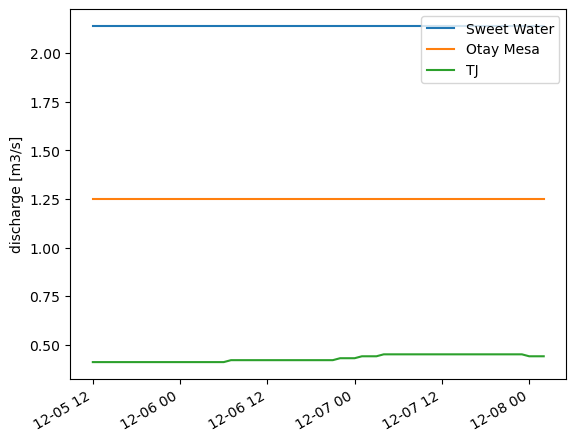

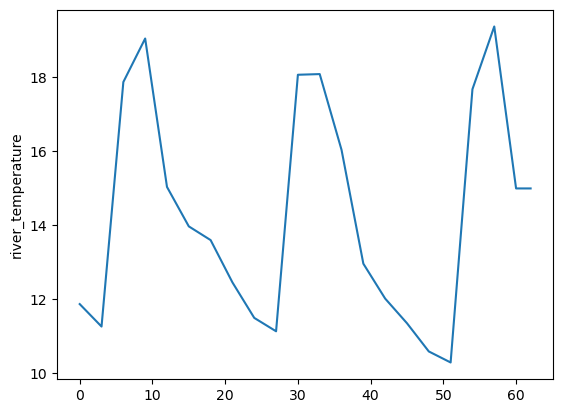

In [2]:



ocnfuns.mk_lv4_river_nc()

20241205
00

river discharge data saved as pickle file


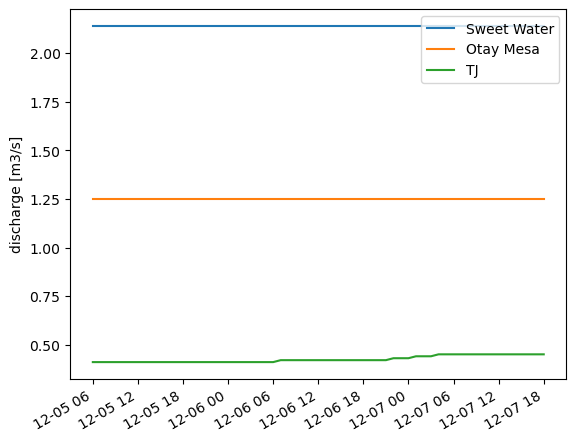

In [3]:


yyyymmddhh = '2024120500'
t_fore = '2024120506'
rivfuns.get_river_flow_nwm(yyyymmddhh,t_fore)


0
6
12
18
24
30
36
42
48
54
60


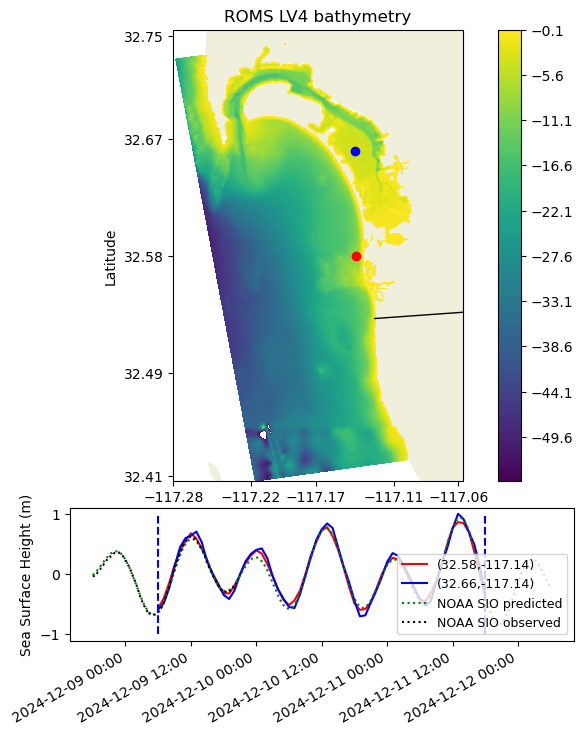

In [2]:
pltfuns.make_all_his_figures('LV4')

In [2]:
initfuns.remake_PFM_pkl_file(0)
PFM = get_PFM_info()


##############
# make clm, nud, river .nc files...

t1=datetime.now()
print('driver_run_forcast_LV4: making clm.nc, nud.nc, and river.nc files...')
os.chdir('../sdpm_py_util')
cmd_list = ['python','-W','ignore','ocn_functions.py','mk_lv4_clm_nc']
ret5 = subprocess.run(cmd_list)   
print('clm return code: ' + str(ret5.returncode) + ' (0=good)')  
cmd_list = ['python','-W','ignore','ocn_functions.py','mk_lv4_nud_nc']
ret5 = subprocess.run(cmd_list)   
print('nud return code: ' + str(ret5.returncode) + ' (0=good)')  
cmd_list = ['python','-W','ignore','ocn_functions.py','mk_lv4_river_nc']
ret5 = subprocess.run(cmd_list)   
print('river return code: ' + str(ret5.returncode) + ' (0=good)')  
os.chdir('../sdpm_py_util')
print('driver_run_forecast_L4:  done making clm, nud, and river.nc files.') 
print('this took:')
t2 = datetime.now()
print(t2-t1)
print('\n')
dt_ic = []
dt_ic.append(t2-t1)

##############
# make swan files
t1=datetime.now()
print('driver_run_forcast_LV4: swan bnd and wnd files...')
os.chdir('../sdpm_py_util')
cmd_list = ['python','-W','ignore','swan_functions.py','cdip_ncs_to_dict','refresh']
ret5 = subprocess.run(cmd_list)   
print('cdip to dictionary return code: ' + str(ret5.returncode) + ' (0=good)')  
fout = PFM['lv4_forc_dir'] + '/' + PFM['lv4_swan_bnd_file']
cmd_list = ['python','-W','ignore','swan_functions.py','mk_swan_bnd_file',fout]
ret5 = subprocess.run(cmd_list)   
print('swan bnd file return code: ' + str(ret5.returncode) + ' (0=good)')  
fout = PFM['lv4_forc_dir'] + '/' + PFM['lv4_swan_wnd_file']
print('making swan wnd file...')
cmd_list = ['python','-W','ignore','swan_functions.py','mk_swan_wnd_file',fout]
ret5 = subprocess.run(cmd_list)   
print('swan wnd file return code: ' + str(ret5.returncode) + ' (0=good)')  
t2 = datetime.now()
print('this took:')
print(t2-t1)
dt_ic = []
dt_ic.append(t2-t1)


we are remaking the PFM.pkl file...
getting PFM info...
removing PFM info file...
we are not adding tidal forcing as Hycom includes tides.
PFM info was saved as /scratch/PFM_Simulations/PFM_run_info.pkl
driver_run_forcast_LV4: making clm.nc, nud.nc, and river.nc files...
OCN_BC dict loaded with pickle
clm return code: 0 (0=good)
nud return code: 0 (0=good)
making river tracer dictionary
/scratch/PFM_Simulations/LV4_Forecast/Forc/LV4_river.nc
river return code: 0 (0=good)
driver_run_forecast_L4:  done making clm, nud, and river.nc files.
this took:
0:00:02.498909


driver_run_forcast_LV4: swan bnd and wnd files...
removing previous cdip .nc files...
...done. getting new cdip .nc files...
...done. making dictionary of cdip data...
...done.

CDIP data saved as pickle file
cdip to dictionary return code: 0 (0=good)

CDIP pickle file loaded
swan bnd file return code: 0 (0=good)
making swan wnd file...
swan wnd file return code: 0 (0=good)
0:00:47.671511
this took:
0:00:47.671511


initfuns.remake_PFM_pkl_file(0)
CD = swanfuns.cdip_ncs_to_dict(refresh=True)
PFM = get_PFM_info()
fout = PFM['lv4_forc_dir'] + '/' + PFM['lv4_swan_bnd_file']
print('making swan bnd file...')
swanfuns.mk_swan_bnd_file(CD,fout)
print('...done.')

In [2]:
initfuns.remake_PFM_pkl_file(0)

##############
# make all of the dotins
t1=datetime.now()
print('making LV4 .in and .sb...')
os.chdir('../sdpm_py_util')
make_LV4_coawst_dotins_dotsb()
print('...done')

we are remaking the PFM.pkl file...
getting PFM info...
removing PFM info file...
we are not adding tidal forcing as Hycom includes tides.
PFM info was saved as /scratch/PFM_Simulations/PFM_run_info.pkl
making LV4 .in and .sb...
 --- making dot_in and dot_sb --- 

CDIP pickle file loaded
...done


In [ ]:


initfuns.remake_PFM_pkl_file(0)
swanfuns.cdip_ncs_to_dict(refresh=True)
PFM = get_PFM_info()
fout = PFM['lv4_forc_dir'] + '/' + PFM['lv4_swan_bnd_file']
print('making swan bnd file...')
swanfuns.mk_swan_bnd_file(fout)
print('...done.')



In [3]:
PFM = get_PFM_info()
fout = PFM['lv4_forc_dir'] + '/' + PFM['lv4_swan_wnd_file']
print('making swan wnd file...')
swanfuns.mk_swan_wnd_file(fout)
print('...done.')


making swan wnd file...
...done.


In [ ]:
import pandas


PFM = get_PFM_info()
t00 = PFM['fetch_time']
t10 = t00 + PFM['forecast_days'] * timedelta(days=1)


fn =PFM['cdip_data_dir'] + '/cdip_2436_2024102912.nc'
cdip = netCDF4.Dataset(fn)
t     = cdip.variables['waveTime']

print(t[0])
t2 = netCDF4.num2date(t[:], t.units)
t2 = np.array([datetime(year=date.year, month=date.month, day=date.day, 
                              hour=date.hour, minute=date.minute, second=date.second) for date in t2])

print(t2[0:3])
print(t00)
print(t10)

msk = (t2 >= t00) & (t2 <= t10)
print(msk)
ii = np.arange(len(t2))
ig = ii[msk]
print(ig)



In [4]:
for fr in CD['f']:
    print(fr)

0.04
0.045
0.05
0.055
0.06
0.065
0.07
0.075
0.08
0.085
0.09
0.095
0.1013
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5


In [4]:
print(len(CD['lats']))

print(np.shape(CD['Spp']))

S2 = np.squeeze(CD['Spp'][0,0,:,:])
nn = np.max(S2) / 9900
S3 = np.round(S2/nn)
print(nn)
print(np.max(S3))
print(np.min(S3))

81
(81, 61, 53, 42)
8.724970648987125e-05
9900.0
0.0


In [3]:
fn = '/scratch/PFM_Simulations/LV4_Forecast/Forc/cdip_data/cdip_2436_2024102906.nc'
cdip = netCDF4.Dataset(fn)

#  'waveTime,waveHs,waveTp,waveDp,waveFrequency,waveDirection,waveDirectionalSpectrum,metaLatitude,metaLongitude'

lat   = cdip['metaLatitude'][:]
lon   = cdip['metaLongitude'][:]
f     = cdip['waveFrequency'][:]
theta = cdip['waveDirection'][:]
Spp   = cdip['waveDirectionalSpectrum'][:]
Hs    = cdip['waveHs'][:]
Tp    = cdip['waveTp'][:]
t     = cdip.variables['waveTime']
units = t.units
calendar = t.calendar if hasattr(t, 'calendar') else 'standard'

# Convert NetCDF time to datetime objects
dtime = netCDF4.num2date(t[:], units=units, calendar=calendar)


In [4]:
fn = '/scratch/PFM_Simulations/LV4_Forecast/Forc/cdip_data/cdip_2436_2024102506.nc'
cdip = xr.open_dataset(fn)

#  'waveTime,waveHs,waveTp,waveDp,waveFrequency,waveDirection,waveDirectionalSpectrum,metaLatitude,metaLongitude'

lat   = cdip['metaLatitude'].values
lon   = cdip['metaLongitude'].values
f     = cdip['waveFrequency'].values
theta = cdip['waveDirection'].values
Spp   = cdip['waveDirectionalSpectrum'].values
Hs    = cdip['waveHs'].values
Tp    = cdip['waveTp'].values
t     = cdip['waveTime']


2024-10-25T03:00:00.000000000


Text(0.5, 1.0, '(32.7331,-117.2696)')

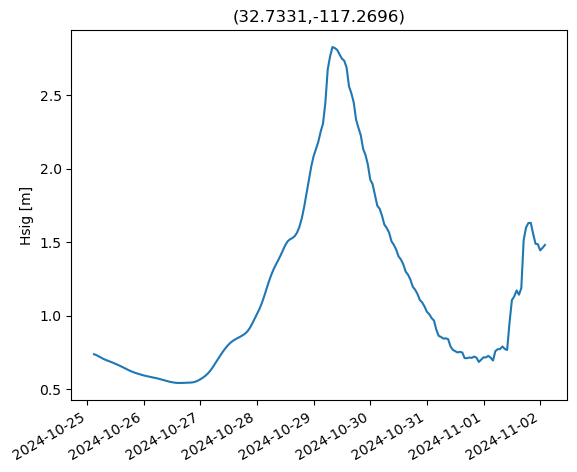

In [14]:
print(t.values[0])
fig, ax = plt.subplots()
p1=ax.plot(t.values,Hs)
plt.setp(plt.xticks()[1], rotation=30, ha='right') # ha is the same as horizontalalignment
plt.ylabel('Hsig [m]')
plt.title('('+str(lat)+','+str(lon)+')')


(192, 53, 72)
(53,)
(72,)
(192,)


Text(0.5, 1.0, '(32.7331,-117.2696) at t= 2024-10-25T03:00:00.000000000')

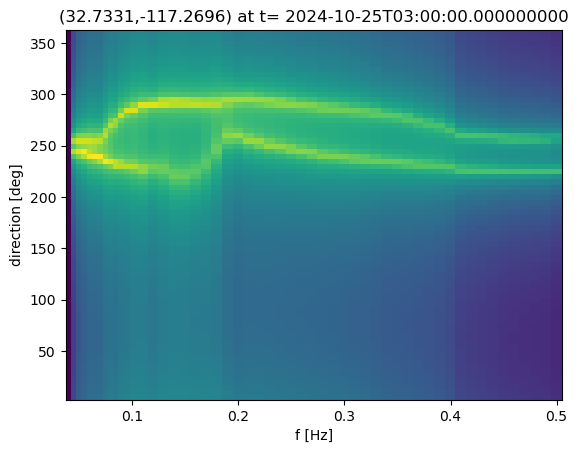

In [24]:
print(np.shape(Spp))
print(np.shape(f))
print(np.shape(theta))
print(np.shape(t))

fig, ax = plt.subplots()
p1=ax.pcolor(f,theta,np.transpose(np.log10(np.squeeze(Spp[0,:,:]))))
plt.ylabel('direction [deg]')
plt.xlabel('f [Hz]')
plt.title('('+str(lat)+','+str(lon)+')'+' at t= '+str(t[0].values))



0.03396741
0.7372099757194519
0.7374976


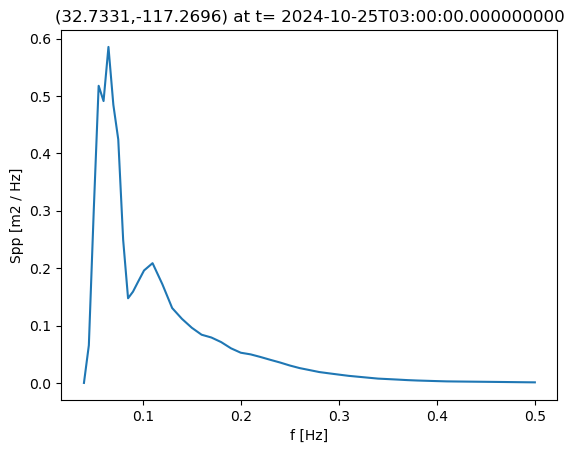

In [35]:
Spp0 = np.squeeze(Spp[0,:,:])
dtheta = theta[1]-theta[0]
Soff = dtheta * np.sum(Spp0,axis=1)
df = f[1]-f[0]
S2 = .5*(Soff[0:-1]+Soff[1:])
dff = f[1:]-f[0:-1] 
vareta =  np.sum( S2*dff )
fig, ax = plt.subplots()
p1=ax.plot(f,Soff)
plt.ylabel('Spp [m2 / Hz]')
plt.xlabel('f [Hz]')
plt.title('('+str(lat)+','+str(lon)+')'+' at t= '+str(t[0].values))
print(vareta)
Hs2 = 4 * np.sqrt(vareta)
print(Hs2)
print(Hs[0])


In [6]:
fn_gr4 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc'
gr4 = xr.open_dataset(fn_gr4)

fns = glob.glob( '/scratch/PFM_Simulations/LV4_Forecast/Forc/cdip_data/*.nc')
n = len(fns)
print('there are ', n, ' cdip locations on the LV4 boundary.')
lats=np.zeros(n)
lons=np.zeros(n)
i=0
for fn in fns:
    cdip = xr.open_dataset(fn)
    lat   = cdip['metaLatitude'].values
    lon   = cdip['metaLongitude'].values
    lats[i] = lat
    lons[i] = lon
    i = i + 1

print(lons[[3,30]])
print(lats[[3,30]])
i_sort = np.argsort(lons)
lons = lons[i_sort]
lats = lats[i_sort]

lon2 = lons.copy()
lat2 = lats.copy()

lons[0] = lon2[3]
lats[0] = lat2[3]
lons[[2,3]] = lon2[[0,2]]
lats[[2,3]] = lat2[[0,2]]


lons = np.flip(lons)
lats = np.flip(lats)

lons[-2] = gr4['lon_rho'].values[-1,2]
lats[-2] = gr4['lat_rho'].values[-1,2]
lons[-1] = gr4['lon_rho'].values[-1,10]
lats[-1] = gr4['lat_rho'].values[-1,10]


print(lats[0:10])
print(lons[0:10])


there are  81  cdip locations on the LV4 boundary.
[-117.20110321 -117.2181015 ]
[32.40840149 32.41329956]
[32.42150116 32.4211998  32.42079926 32.42020035 32.41949844 32.41870117
 32.41790009 32.41699982 32.41609955 32.41500092]
[-117.10810089 -117.11049652 -117.11360168 -117.11759949 -117.12249756
 -117.12789917 -117.13369751 -117.13990021 -117.14679718 -117.15440369]


[-117.29    -117.05542]
[32.39     32.762485]
[-0.00239563 -0.00310516 -0.0039978  -0.00489807 -0.00540161 -0.00579834
 -0.0062027  -0.00689697 -0.00760651 -0.00369263 -0.00440216 -0.00460052
 -0.00489807 -0.00530243 -0.00279999 -0.00610352 -0.00679779 -0.00430298
 -0.00379944 -0.0039978  -0.0039978  -0.0042038  -0.00169373 -0.00180054
 -0.00010681 -0.00019836 -0.00029755 -0.00019836 -0.00030518 -0.00019836
 -0.00029755 -0.00019836 -0.00030518 -0.00019836 -0.00019836 -0.00019836
 -0.00030518 -0.00029755 -0.00039673 -0.00040436 -0.00049591 -0.00040436
 -0.00039673 -0.00040436 -0.00029755 -0.00039673 -0.00030518 -0.00059509
 -0.00060272 -0.00050354 -0.00069427 -0.0007019  -0.00099945 -0.00090027
 -0.0007019  -0.0007019  -0.00179291 -0.00230408 -0.00209808 -0.0022049
 -0.00179291 -0.00110626 -0.00069427 -0.00240326 -0.00219727 -0.00250244
 -0.00260162 -0.00289917 -0.00309753 -0.00189972 -0.0019989  -0.00110626
 -0.00109863 -0.00119781 -0.00140381 -0.00279999 -0.00319672 -0.0042038
  0.000

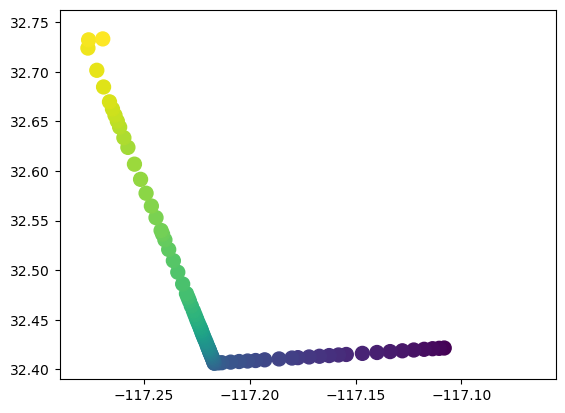

In [23]:
fig, ax = plt.subplots()
p2=ax.scatter(lons,lats, s=100*np.ones((n)), c=np.arange(n)  )
#p1=ax.plot(gr4['lon_rho'].values,gr4['lat_rho'].values,'.m',markersize=1)


#xlms = -117.281 * np.array([1.0,0.99984])
#ylms = 32.731 * np.array([1.0,1.0001])
xlms = -117.29 * np.array([1.0,0.998])
ylms = 32.39 * np.array([1.0,1.0115])
print(xlms)
print(ylms)
plt.xlim(xlms[0],xlms[1]) 
plt.ylim(ylms[0],ylms[1]) 

print(lons[1:]-lons[0:-1])

we are remaking the PFM.pkl file...
getting PFM info...
removing PFM info file...
we are not adding tidal forcing as Hycom includes tides.
PFM info was saved as /scratch/PFM_Simulations/PFM_run_info.pkl


FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/PFM_Simulations/LV4_Forecast/Forc/cdip_data/cdip_2436_2024102506.nc'

In [ ]:


#print(lats)
ii=[3,30]
p2=ax.plot(lons[-1],lats[-1],'g*')
p2=ax.plot(lons[-2],lats[-2],'c*')
print(lats[ii])
print(gr4['lon_rho'].values[-1,2],gr4['lat_rho'].values[-1,2])
print(lons[-1],lats[-1])
print(gr4['lon_rho'].values[-1,10],gr4['lat_rho'].values[-1,10])
print(lons[-2],lats[-2])

p1=ax.plot(gr4['lon_rho'].values[-1,2],gr4['lat_rho'].values[-1,2],'m+')
p1=ax.plot(gr4['lon_rho'].values[-1,10],gr4['lat_rho'].values[-1,10],'y+')

print(np.min(gr4['lon_rho'].values))
print(np.min(gr4['lat_rho'].values))
print(np.shape(gr4['lon_rho'].values))

# [-1,2] --> 30
# [-1,10] --> 3

#xlms = -117.281 * np.array([1.0,0.99984])
#ylms = 32.731 * np.array([1.0,1.0001])
#print(xlms)
#print(ylms)
#plt.xlim(xlms[0],xlms[1]) 
#plt.ylim(ylms[0],ylms[1]) 



In [124]:
def mk_swan_grd_file(lns,lts,fout):
    # this function makes a swan .grd file from arrays of lons and lats
    # if using roms these should be lon_rho and lat_rho.
    ny,nx = np.shape(lns)
    with open(fout,'w') as f:
        for aa in np.arange(ny):
            for bb in np.arange(nx):
                f.write(f'{lns[aa,bb] : .6f}')
                f.write('\n')
        for aa in np.arange(ny):
            for bb in np.arange(nx):
                f.write(f'{lts[aa,bb] : .6f}')
                f.write('\n')

def mk_swan_bot_file(hb,fout):
    # this function makes a swan .grd file from arrays of lons and lats
    # if using roms these should be lon_rho and lat_rho.
    ny,nx = np.shape(hb)
    with open(fout,'w') as f:
        for aa in np.arange(ny):
            for bb in np.arange(nx):
                f.write(f'{hb[aa,bb] : .6f}')
                f.write('\t')
            f.write('\n')



In [108]:
lat_dum = np.array([[0,0,0],[1,1,1],[2,2,2]])
lon_dum = np.array([[0.5,1.5,2.5],[0.5,1.5,2.5],[0.5,1.5,2.5]])
#print(lat_dum)
#print(lon_dum)

fout = '/scratch/PFM_Simulations/LV4_Forecast/Forc/cdip_data/dum.grd'
mk_swan_grd_file(lon_dum,lat_dum,fout)


print(1110024 / 2 / 1142 / 486)
print(1109052 / 2 / 1141 / 486)


1.0
1.0


In [125]:
fout = '/scratch/PFM_Simulations/Grids/swan_LV4.grd'
mk_swan_grd_file(gr4['lon_rho'].values,gr4['lat_rho'].values,fout)
fout = '/scratch/PFM_Simulations/Grids/swan_LV4.bot'
mk_swan_bot_file(gr4['h'].values,fout)


[37.8358     39.65255187 40.90612306 42.8358     43.98676817 45.8358
 46.8358     47.8358     49.06089597 49.8358    ]


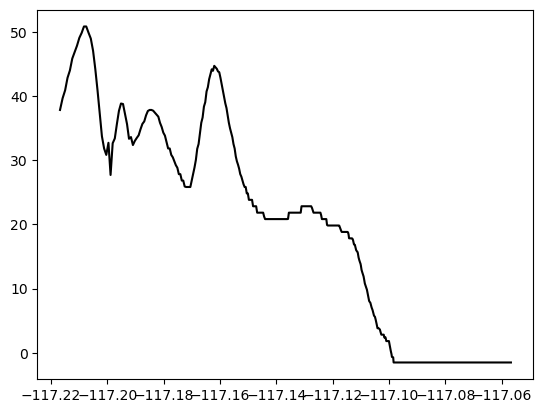

In [112]:
fn_gr4 = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc'
gr4 = xr.open_dataset(fn_gr4)
print(gr4['h'].values[0,0:10])

fig, ax = plt.subplots()
p1=ax.plot(gr4['lon_rho'].values[0,:],gr4['h'].values[0,:],'k')
